## SVM 
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

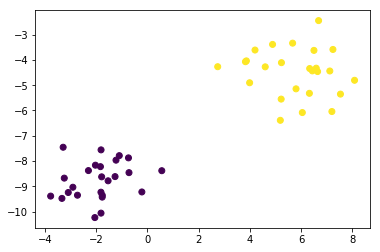

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

In [3]:
X.shape , y.shape

((50, 2), (50,))

In [4]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

In [5]:
len(postiveX),len(negativeX)

(25, 25)

In [6]:
postiveX[:5],negativeX[:5]

([array([ 7.12731332, -4.4394424 ]),
  array([ 6.68873898, -2.44840134]),
  array([ 3.99337867, -4.90451269]),
  array([ 4.20397723, -3.61164749]),
  array([ 5.19327641, -6.38845134])],
 [array([-1.1004791 , -7.78436803]),
  array([-1.8171622 , -9.22909875]),
  array([ -2.05521901, -10.23141199]),
  array([-0.21804625, -9.21962706]),
  array([-1.83682056, -8.21952131])])

In [7]:
#dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

In [8]:
#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias

max_feature_value=float('-inf')
min_feature_value=float('+inf')

# find max and min values
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])

In [9]:
max_feature_value  , min_feature_value

(8.09408177937001, -10.231411985451054)

In [10]:
#different learning rates
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

In [11]:
learning_rate

[0.809408177937001, 0.08094081779370009, 0.008094081779370009]

In [12]:
# ignore this cell

#b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value

# one of the values of bias while training  
for b in np.arange(-1*(max_feature_value*2), max_feature_value*2, learning_rate[0]*5): 
    print(b)

-16.18816355874002
-12.141122669055013
-8.094081779370008
-4.047040889685002
3.552713678800501e-15
4.047040889685011
8.094081779370015
12.141122669055019


In [13]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2


In [14]:
SVM_Training(data_dict)

In [15]:
w

array([0.32376327, 0.32376327])

In [16]:
b

1.4974051291840844

In [17]:
pred=np.dot(X,w)+b
pred[:5]

array([ 2.36763901,  2.87027071, -1.37918204,  1.2024134 , -2.07896845])

In [18]:
pred=np.sign(pred)
pred[:5]

array([ 1.,  1., -1.,  1., -1.])

In [19]:
pred=pred.astype(int)
pred[:5]

array([ 1,  1, -1,  1, -1])

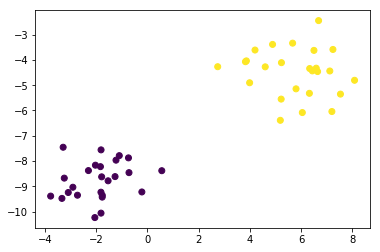

In [20]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=pred)
plt.show()